자연어_CH4
=======================
텍스트 분류
--------------------

### 감정 분류
#### 목표
1. 데이터를 불러오는 것과 정제되지 않은 데이터를 활용하기 쉽게 전처리하는 과정
1. 데이터를 분석하는 과정
1. 실제로 문제를 해결하기 위해 알고리즘을 모델링하는 과정

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# 그래프를 주피터 노트북에서 바로 그리도록함

In [3]:
train_data = pd.read_csv('labeledTrainData.tsv', header = 0, delimiter = "\t", quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


##### 데이터 분석의 순서
1. 데이터 크기
2. 데이터 개수
3. 각 리뷰의 문자 길이 분포
4. 많이 사용된 단어
5. 긍정, 부정 데이터의 분포
6. 각 리뷰의 단어 개수 분포
7. 특수문자 및 대문자, 소문자 비율

In [7]:
print("파일크기: ")
for file in os.listdir('C:/Users/user/PycharmProjects/Webscraping/'):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize('C:/Users/user/PycharmProjects/Webscraping/' + file) / 1000000, 2)) + 'MB')

파일크기: 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


In [8]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 25000


In [9]:
# 문자의 길이
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Length of review')

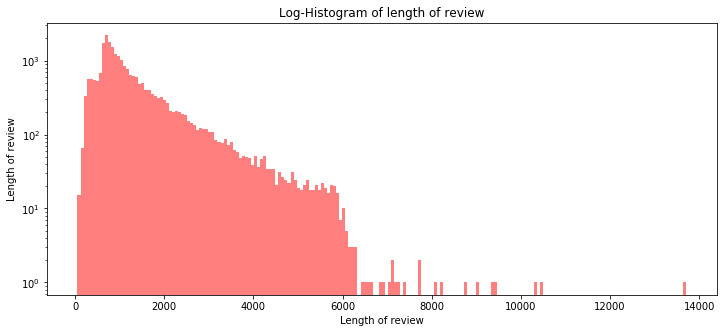

In [12]:
# 히스토그램 그리기

# 그래프에 대한 이미지 크기 선언
# figsize: (가로, 세로) 형태의 튜플로 입력

plt. figure(figsize = (12, 5))

# 히스토그램 선언
# bins: 히스토그램 값에 대한 버킷 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨

plt.hist(train_length, bins = 200, alpha = 0.5, color = 'r', label = 'word')
plt.yscale('log', nonposy = 'clip')

# 그래프 제목
plt.title('Log-Histogram of length of review')

# 그래프 x 축 라벨
plt.xlabel('Length of review')

# 그래프 y 축 라벨
plt.ylabel('Length of review')


In [13]:
print('리뷰 최대 길이: {}'.format(np.max(train_length)))
print('리뷰 최소 길이: {}'.format(np.min(train_length)))
print('리뷰 평균 길이: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 중간 길이: {}'.format(np.median(train_length)))

# 사분위의 대한 경우는 0~100 스케일로 돼 있음
print('제1사분위 길이: {}'.format(np.percentile(train_length, 25)))
print('제3사분위 길이: {}'.format(np.percentile(train_length, 75)))

리뷰 최대 길이: 13710
리뷰 최소 길이: 54
리뷰 평균 길이: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 중간 길이: 983.0
제1사분위 길이: 705.0
제3사분위 길이: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x22debba7cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x22debc6cba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x22debc6c128>],
 'medians': [<matplotlib.lines.Line2D at 0x22debc6cfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22debc58908>],
 'means': [<matplotlib.lines.Line2D at 0x22debc585c0>]}

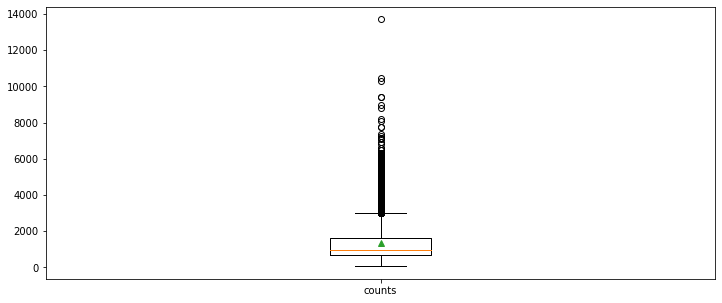

In [14]:
plt.figure(figsize=(12,5))
# 박스 플롯 생성
# 첫 번째 인자: 여러 분포에 대한 데이터 리스트 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_length],
             labels = ['counts'],
             showmeans = True)

(-0.5, 799.5, 599.5, -0.5)

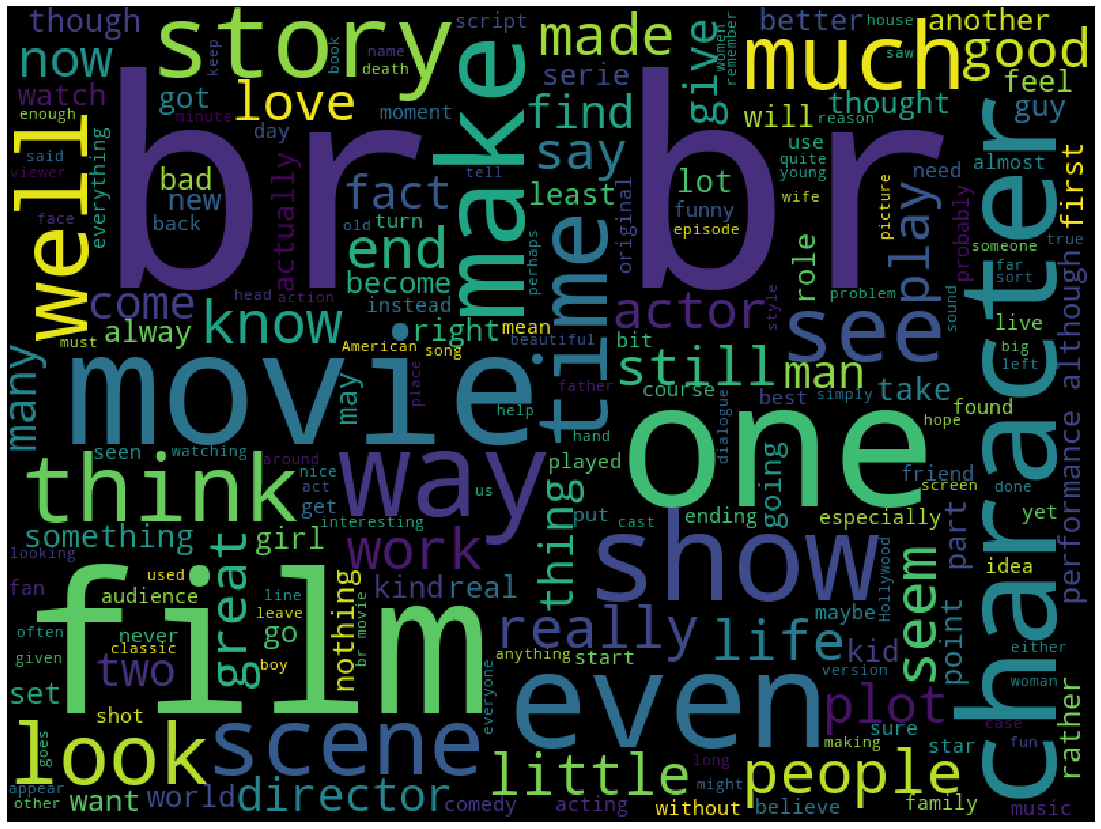

In [16]:
from wordcloud import WordCloud
cloud = WordCloud(width = 800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize = (20, 15))
plt.imshow(cloud)
plt.axis('off')

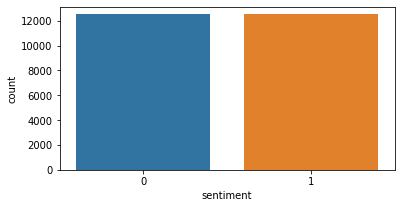

In [17]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

In [18]:
print('긍정 리뷰 개수: {}'.format(train_data['sentiment'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


Text(0, 0.5, 'Number of reviews')

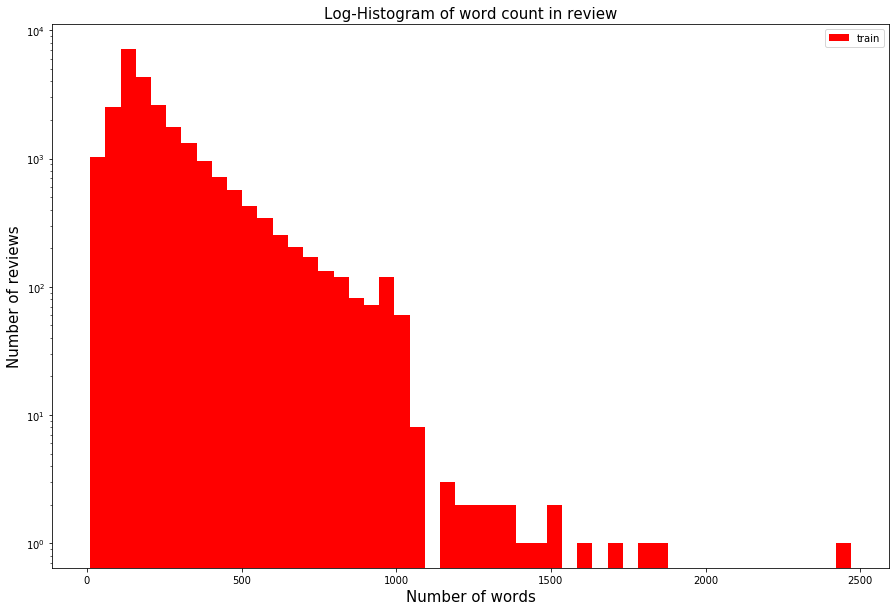

In [19]:
# 각 리뷰를 단어 기준으로 나눠서 각 리뷰당 단어의 개수를 확인
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins = 50, facecolor = 'r', label = 'train')
plt.title('Log-Histogram of word count in review', fontsize = 15)
plt.yscale('log', nonposy = 'clip')
plt.legend()
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Number of reviews', fontsize = 15)

In [20]:
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))

# 사분위의 대한 경우는 0~100 스케일로 돼 있음
print('제1사분위 길이: {}'.format(np.percentile(train_word_counts, 25)))
print('제3사분위 길이: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 2470
리뷰 단어 개수 최솟값: 10
리뷰 단어 개수 평균값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간값: 174.0
제1사분위 길이: 127.0
제3사분위 길이: 284.0


In [21]:
# 전처리 과정에서 대문자의 경우 모두 소문자로 바꾸고, 특수 문자의 경우 제거한다.
# 이 과정은 학습에 방해가 되는 요소들을 제거하기 위함이다.

qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자 인 질문: 0.00%
대문자가있는 질문: 99.59%
숫자가있는 질문: 56.66%
